In [1]:
import matplotlib.pyplot as plt
import time
from mlrose_hiive import simulated_annealing, random_hill_climb, mimic, genetic_alg
from mlrose_hiive import OneMax
from mlrose_hiive import FlipFlop
from mlrose_hiive import DiscreteOpt
from mlrose_hiive.algorithms import GeomDecay
import mlrose_hiive

In [2]:
fitness = OneMax()
problem = DiscreteOpt(length=100, fitness_fn=fitness)
problem.set_mimic_fast_mode(True)

In [3]:
fitness = FlipFlop()
problem = DiscreteOpt(length=100, fitness_fn=fitness)
problem.set_mimic_fast_mode(True)

In [38]:
best_state, best_fitness, curve = random_hill_climb(problem, max_iters=10000, restarts=50, curve=True)
print(best_fitness)
print(curve.shape)

604.0
(224, 2)


In [52]:
PROBLEM_SIZE = 100
problem = DiscreteOpt(length=PROBLEM_SIZE, fitness_fn=fitness)
restarts = [1, 10, 50, 100, 200]
rh_runner = mlrose_hiive.RHCRunner(problem, seed=42, experiment_name='RHC_FlipFlop_100',
                                  iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5], output_directory='output',
                                  max_attempts=10, restart_list=restarts)
rhc_stats_100, rhc_curve_100 = rh_runner.run()

In [54]:
rhc_stats_100[rhc_stats_100.Fitness == rhc_stats_100.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
507,50.0,74.0,3085,6.276970,"[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, ...",100,500,76
869,50.0,74.0,3085,9.573497,"[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, ...",200,500,76
1035,50.0,74.0,4688,17.432476,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, ...",200,500,121


<AxesSubplot:xlabel='Restarts Problem size 100', ylabel='Fitness'>

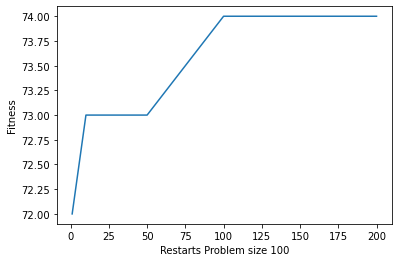

In [61]:
rhc_stats_100.groupby(['Restarts']).max()['Fitness'].plot(xlabel='Restarts Problem size 100', ylabel='Fitness')

<AxesSubplot:xlabel='current_restart', ylabel='Fitness problem size 100'>

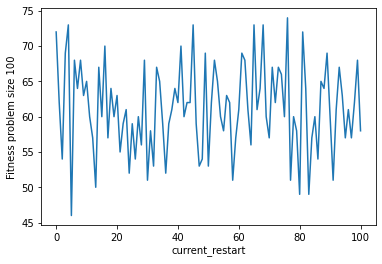

In [76]:
rhc_stats_100[rhc_stats_100.Restarts == 100].set_index('Iteration').groupby('current_restart').max()['Fitness'].plot(ylabel='Fitness problem size 100', x='Iteration', y='Fitness')

Text(0.5, 1.0, 'Fitness vs Restarts problem size 100')

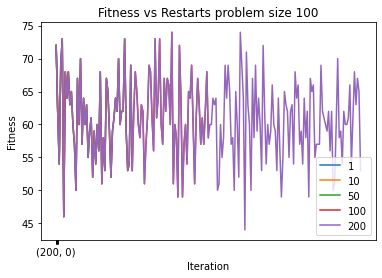

In [60]:
fig, ax = plt.subplots(1, 1)
for temp in restarts:
    best_curve = rhc_stats_100[rhc_stats_100.Restarts == temp]
    best_curve = best_curve[best_curve.max_iters == 500]
#     best_curve = best_curve[best_curve.schedule_type == 'geometric']
    best_curve.reset_index(inplace=True)
    best_curve.groupby(['Restarts', 'current_restart']).max()['Fitness'].plot(x='Iteration', y='Fitness', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(restarts)
ax.set_title("Fitness vs Restarts problem size 100")

In [25]:
PROBLEM_SIZE = 500
problem = DiscreteOpt(length=PROBLEM_SIZE, fitness_fn=fitness)
restarts = [50, 100]
rh_runner = mlrose_hiive.RHCRunner(problem, seed=42, experiment_name='RHC_FlipFlop_500',
                                  iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5], output_directory='output',
                                  max_attempts=10, restart_list=restarts)
rhc_stats_500, rhc_curve_500 = rh_runner.run()

In [26]:
rhc_stats_500[rhc_stats_500.Fitness == rhc_stats_500.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
89,250.0,310.0,1392,2.228582,"[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, ...",50,2500,22
90,1000.0,310.0,1392,2.228582,"[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, ...",50,2500,22
91,2500.0,310.0,1392,2.228582,"[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, ...",50,2500,22
293,250.0,310.0,1392,3.042544,"[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, ...",100,2500,22
294,1000.0,310.0,1392,3.042544,"[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, ...",100,2500,22
295,2500.0,310.0,1392,3.042544,"[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, ...",100,2500,22


<AxesSubplot:xlabel='Restarts Problem size 500', ylabel='Fitness'>

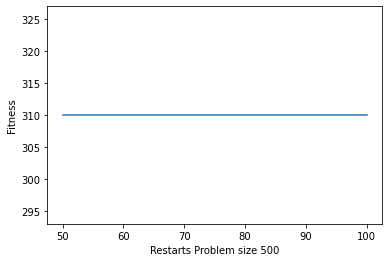

In [62]:
rhc_stats_500.groupby(['Restarts']).max()['Fitness'].plot(xlabel='Restarts Problem size 500', ylabel='Fitness')

In [40]:
decay = ExpDecay(init_temp=10000, exp_const=0.5)
sa_best_state, sa_best_fitness, sa_curve = simulated_annealing(problem, schedule=decay, curve=True)
print(sa_best_fitness, sa_curve.shape)

752.0 (1136, 2)


In [31]:
PROBLEM_SIZE = 100

In [36]:
problem = DiscreteOpt(length=PROBLEM_SIZE, fitness_fn=fitness)
init_temp = [1, 10, 25]
sa_runner = mlrose_hiive.SARunner(problem,
                           seed=42,
                           output_directory='output',
                           experiment_name='SA_Flip_Flops_100',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5, 10000],
                           temperature_list=init_temp,
                           decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay],
                           )
sa_stats, sa_curve = sa_runner.run()

In [37]:
sa_stats[sa_stats.Fitness == sa_stats.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
9,10000.0,99.0,8033,16.013573,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",exponential,1,NaN,0.001,0.923054,1,10000,0.005


In [63]:
print(sa_stats[sa_stats.schedule_type=='exponential'].max()['Fitness'])
print(sa_stats[sa_stats.schedule_type=='geometric'].max()['Fitness'])

print(sa_5_stats[sa_stats.schedule_type=='exponential'].max()['Fitness'])
print(sa_5_stats[sa_stats.schedule_type=='geometric'].max()['Fitness'])

99.0
98.0
482.0
479.0


Text(0.5, 1.0, 'Fitness vs Initial Temp Problem size 100')

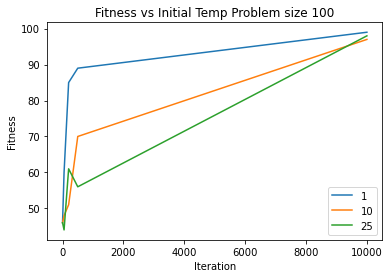

In [64]:
fig, ax = plt.subplots(1, 1)
for temp in init_temp:
    best_curve = sa_stats[sa_stats.schedule_init_temp == temp]
    best_curve = best_curve[sa_stats.max_iters == 10000]
    best_curve = best_curve[sa_stats.schedule_type == 'exponential']
    best_curve.reset_index(inplace=True)
    best_curve.plot(x='Iteration', y='Fitness', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(init_temp)
ax.set_title("Fitness vs Initial Temp Problem size 100")

Text(0.5, 1.0, 'Time vs Initial Temp Problem size 100')

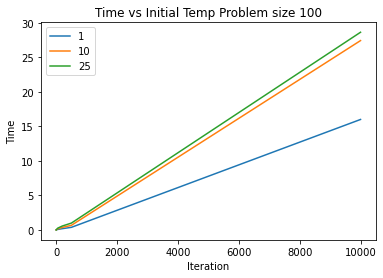

In [77]:
fig, ax = plt.subplots(1, 1)
for temp in init_temp:
    best_curve = sa_stats[sa_stats.schedule_init_temp == temp]
    best_curve = best_curve[sa_stats.max_iters == 10000]
    best_curve = best_curve[sa_stats.schedule_type == 'exponential']
    best_curve.reset_index(inplace=True)
    best_curve.plot(x='Iteration', y='Time', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Time")
ax.legend(init_temp)
ax.set_title("Time vs Initial Temp Problem size 100")

In [38]:
PROBLEM_SIZE = 500
problem = DiscreteOpt(length=PROBLEM_SIZE, fitness_fn=fitness)
init_temp = [1, 10, 25]
sa_runner = mlrose_hiive.SARunner(problem,
                           seed=42,
                           output_directory='output',
                           experiment_name='SA_Flip_Flops_500',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5, 10000],
                           temperature_list=init_temp,
                           decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])
sa_5_stats, sa_5_curve = sa_runner.run()

In [39]:
sa_5_stats[sa_5_stats.Fitness == sa_5_stats.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_exp_const
9,10000.0,482.0,11824,38.147287,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",exponential,1,NaN,0.001,0.82635,1,10000,0.005


Text(0.5, 1.0, 'Fitness vs Initial Temp Problem size 500')

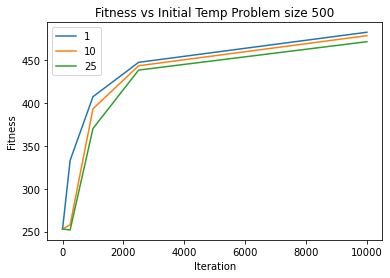

In [65]:
fig, ax = plt.subplots(1, 1)
for temp in init_temp:
    best_curve = sa_5_stats[sa_5_stats.schedule_init_temp == temp]
    best_curve = best_curve[sa_5_stats.max_iters == 10000]
    best_curve = best_curve[sa_5_stats.schedule_type == 'exponential']
    best_curve.reset_index(inplace=True)
    best_curve.plot(x='Iteration', y='Fitness', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.legend(init_temp)
ax.set_title("Fitness vs Initial Temp Problem size 500")

Text(0.5, 1.0, 'Time vs Initial Temp Problem size 500')

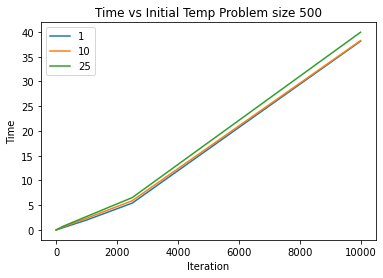

In [78]:
fig, ax = plt.subplots(1, 1)
for temp in init_temp:
    best_curve = sa_5_stats[sa_5_stats.schedule_init_temp == temp]
    best_curve = best_curve[sa_5_stats.max_iters == 10000]
    best_curve = best_curve[sa_5_stats.schedule_type == 'exponential']
    best_curve.reset_index(inplace=True)
    best_curve.plot(x='Iteration', y='Time', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Time")
ax.legend(init_temp)
ax.set_title("Time vs Initial Temp Problem size 500")

In [17]:
ga_best_state, ga_best_fitness, ga_curve = genetic_alg(problem, curve=True)

In [42]:
print(ga_best_fitness, ga_curve.shape)

572.0 (11, 2)


In [29]:
PROBLEM_SIZE = 100
problem = DiscreteOpt(length=PROBLEM_SIZE, fitness_fn=fitness)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
ga_runner = mlrose_hiive.GARunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5],
                           experiment_name='GA_Flip_Flops_100',
                           population_sizes=population, mutation_rates=[0.1, 0.3, 0.5])
ga_stats_100, ga_curve_100 = ga_runner.run()

In [30]:
ga_stats_100[ga_stats_100.Fitness == ga_stats_100.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
18,200.0,94.0,40416,10.574783,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, ...",200.0,0.3,500
19,500.0,94.0,100716,26.309175,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, ...",200.0,0.3,500


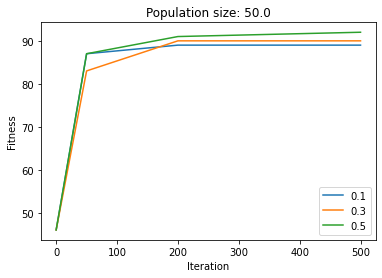

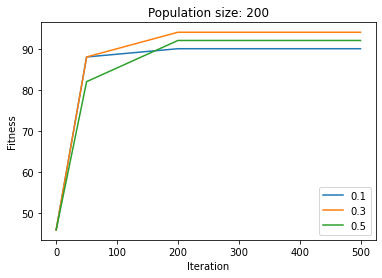

In [79]:
PROBLEM_SIZE = 100
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = ga_stats_100[ga_stats_100['Population Size'] == pop_size]
    for mut in [0.1, 0.3, 0.5]:
        best_curve = pop_curve[pop_curve['Mutation Rate'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.1, 0.3, 0.5])
    ax.set_title(f"Population size: {pop_size}")

In [40]:
PROBLEM_SIZE = 500
problem = DiscreteOpt(length=PROBLEM_SIZE, fitness_fn=fitness)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
ga_runner = mlrose_hiive.GARunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[PROBLEM_SIZE/2, PROBLEM_SIZE*2, PROBLEM_SIZE*5],
                           experiment_name='GA_Flip_Flops_500',
                           population_sizes=population, mutation_rates=[0.1, 0.3, 0.5])
ga_stats_500, ga_curve_500 = ga_runner.run()

In [41]:
ga_stats_500[ga_stats_500.Fitness == ga_stats_500.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
22,1000.0,463.0,792844,898.615006,"[1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...",1000.0,0.5,2500
23,2500.0,463.0,792844,898.615006,"[1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...",1000.0,0.5,2500


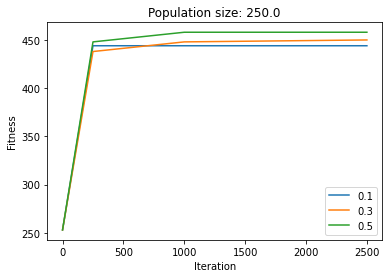

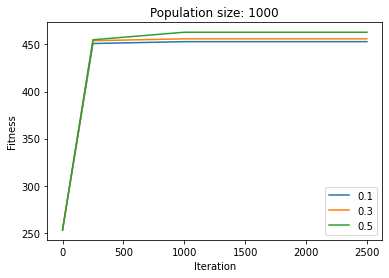

In [80]:
PROBLEM_SIZE = 500
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = ga_stats_500[ga_stats_500['Population Size'] == pop_size]
    for mut in [0.1, 0.3, 0.5]:
        best_curve = pop_curve[pop_curve['Mutation Rate'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.1, 0.3, 0.5])
    ax.set_title(f"Population size: {pop_size}")

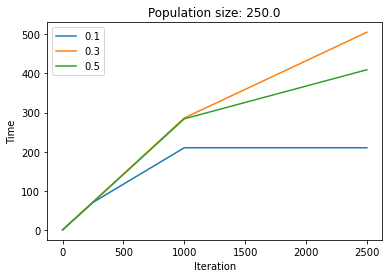

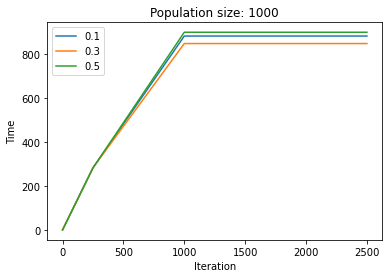

In [81]:
PROBLEM_SIZE = 500
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = ga_stats_500[ga_stats_500['Population Size'] == pop_size]
    for mut in [0.1, 0.3, 0.5]:
        best_curve = pop_curve[pop_curve['Mutation Rate'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Time', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Time")
    ax.legend([0.1, 0.3, 0.5])
    ax.set_title(f"Population size: {pop_size}")

In [44]:
m_best_state, m_best_fitness, m_curve = mimic(problem, curve=True)
print(m_best_fitness, m_curve.shape)

750.0 (36, 2)


In [49]:
problem = DiscreteOpt(length=100, fitness_fn=fitness)
mimic(problem, max_iters=10)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 99.0,
 None)

In [83]:
PROBLEM_SIZE = 100
problem = DiscreteOpt(length=PROBLEM_SIZE, fitness_fn=fitness)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2, 500]
m_runner = mlrose_hiive.MIMICRunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[2000],
                           experiment_name='mimc_Flip_Flops_100',
                           keep_percent_list=[0.25, 0.5, 0.75]
                                    , population_sizes=population
                            , use_fast_mimic=True)
m_stats_100, m_curve_100 = m_runner.run()

In [84]:
m_stats_100[m_stats_100.Fitness == m_stats_100.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
13,2000,95.0,260030,128.970429,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,500.0,0.25,2000
15,2000,95.0,266045,132.348196,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,500.0,0.50,2000


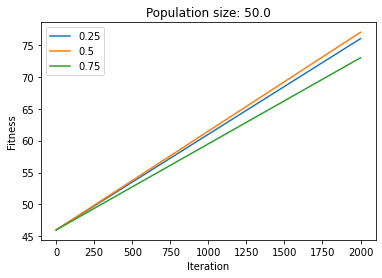

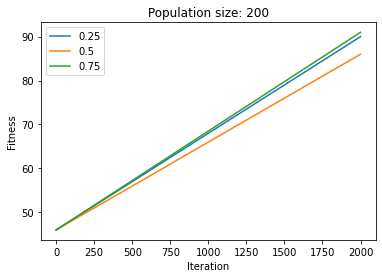

In [87]:
PROBLEM_SIZE = 100
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_100[m_stats_100['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")

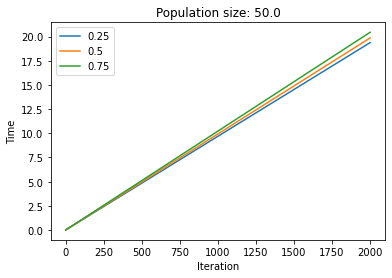

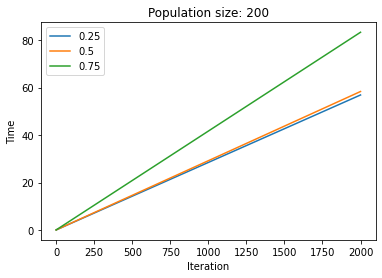

In [86]:
PROBLEM_SIZE = 100
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_100[m_stats_100['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Time', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Time")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")

In [85]:
PROBLEM_SIZE = 500
problem = DiscreteOpt(length=PROBLEM_SIZE, fitness_fn=fitness)
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
m_runner = mlrose_hiive.MIMICRunner(problem,
                           seed=42,
                           output_directory='output',
                           iteration_list=[2000],
                           experiment_name='mimc_Flip_Flops_500',
                           keep_percent_list=[0.25, 0.5, 0.75]
                                    , population_sizes=population
                            , use_fast_mimic=True)
m_stats_500, m_curve_500 = m_runner.run()

In [46]:
m_stats_100[m_stats_100.Fitness == m_stats_100.Fitness.max()]

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
13,250.0,446.0,251281,1573.935452,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,1000.0,0.25,2500
14,1000.0,446.0,551581,3739.656603,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,1000.0,0.25,2500
15,2500.0,446.0,551581,3739.656603,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",True,1000.0,0.25,2500


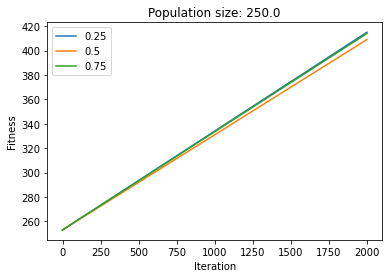

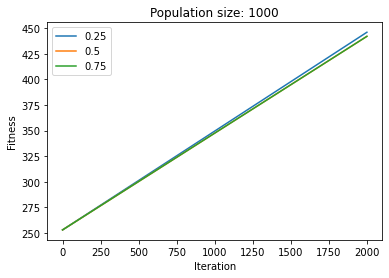

In [88]:
PROBLEM_SIZE = 500
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_500[m_stats_500['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Fitness', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Fitness")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")

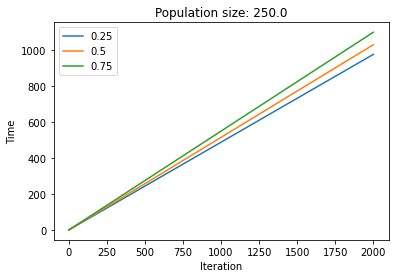

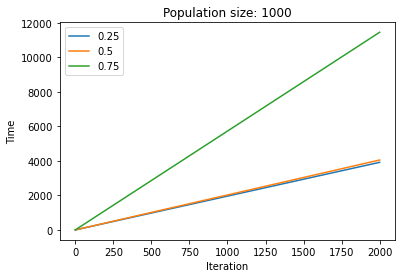

In [89]:
PROBLEM_SIZE = 500
population = [PROBLEM_SIZE/2, PROBLEM_SIZE*2]
for pop_size in population:
    fig, ax = plt.subplots(1, 1)
    pop_curve = m_stats_500[m_stats_500['Population Size'] == pop_size]
    for mut in [0.25, 0.5, 0.75]:
        best_curve = pop_curve[pop_curve['Keep Percent'] == mut]
#         best_curve = best_curve[sa_5_stats.max_iters == 10000]
#         best_curve = best_curve[best_curve.schedule_type == 'geometric']
#         best_curve.reset_index(inplace=True)
        best_curve.plot(x='Iteration', y='Time', ax=ax)
#         best_curve['Fitness'].plot(ax=ax)
        
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Time")
    ax.legend([0.25, 0.5, 0.75])
    ax.set_title(f"Population size: {pop_size}")